In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [46]:
# column headings
columns = ['age', 'sex', 'bmi', 'average_bp', 's1', 's2', 's3', 's4', 's5', 's6']
# load regression dataset
diabetes, target = load_diabetes(return_X_y=True)
diabetes = pd.DataFrame(data=diabetes, columns=columns)
print(diabetes.shape)
diabetes.head()

(442, 10)


,age,sex,bmi,average_bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [49]:
# add target to dataframe
diabetes['target'] = target
diabetes.head()

,age,sex,bmi,average_bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Assumption: Linear Relationship
We assume the features have a linear relationship with the target.

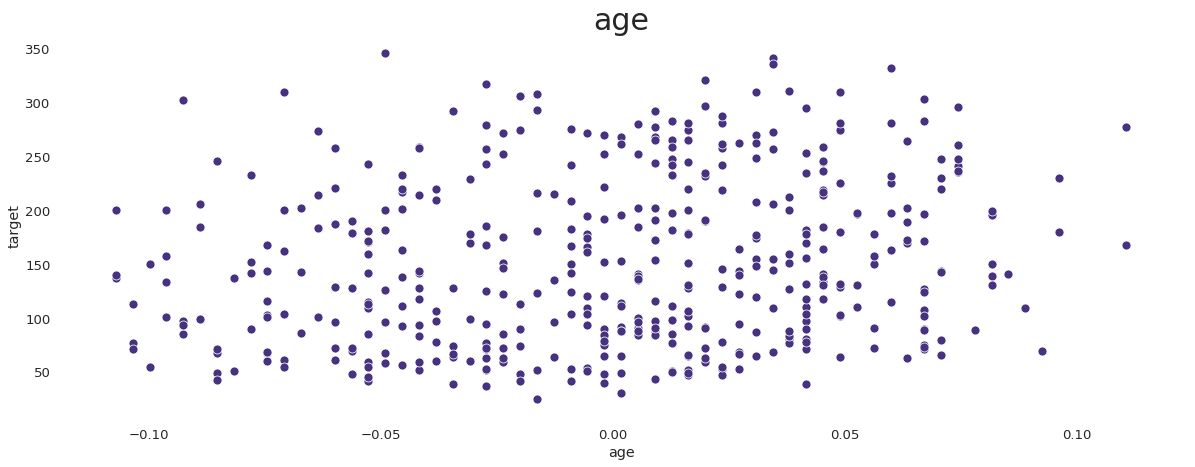

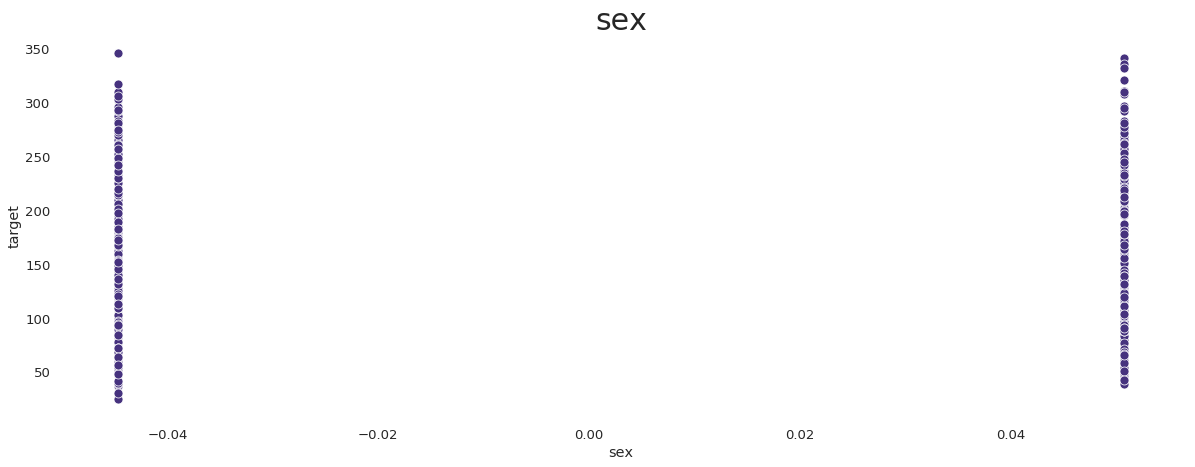

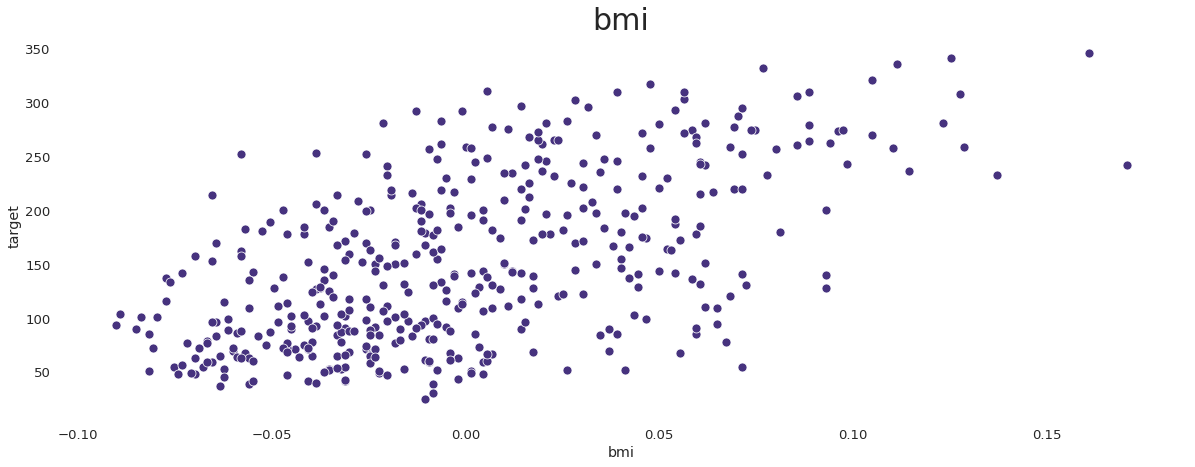

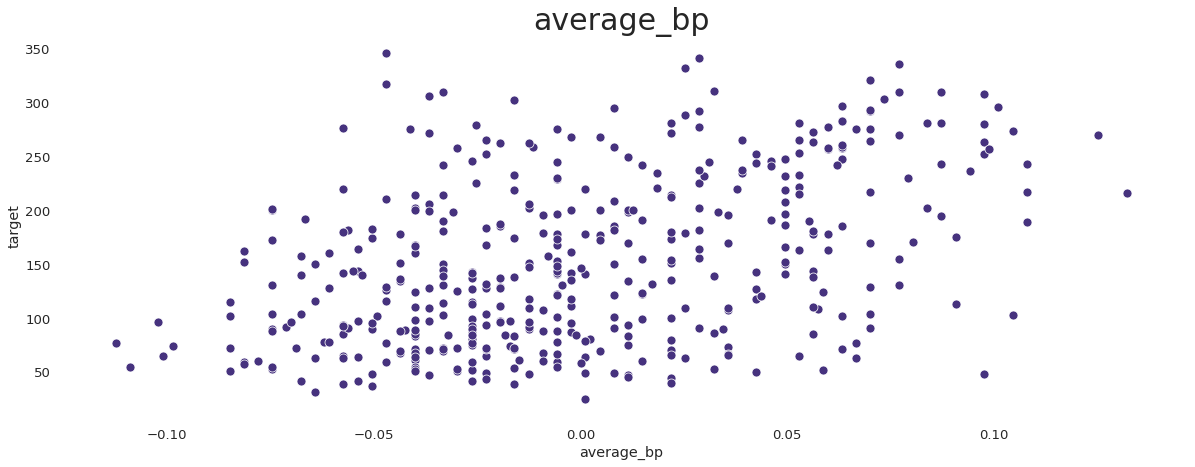

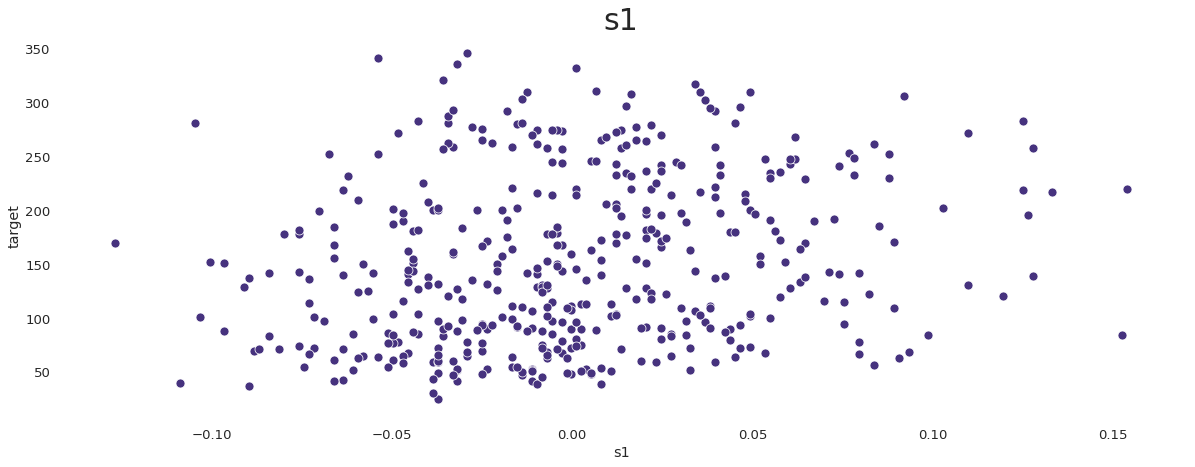

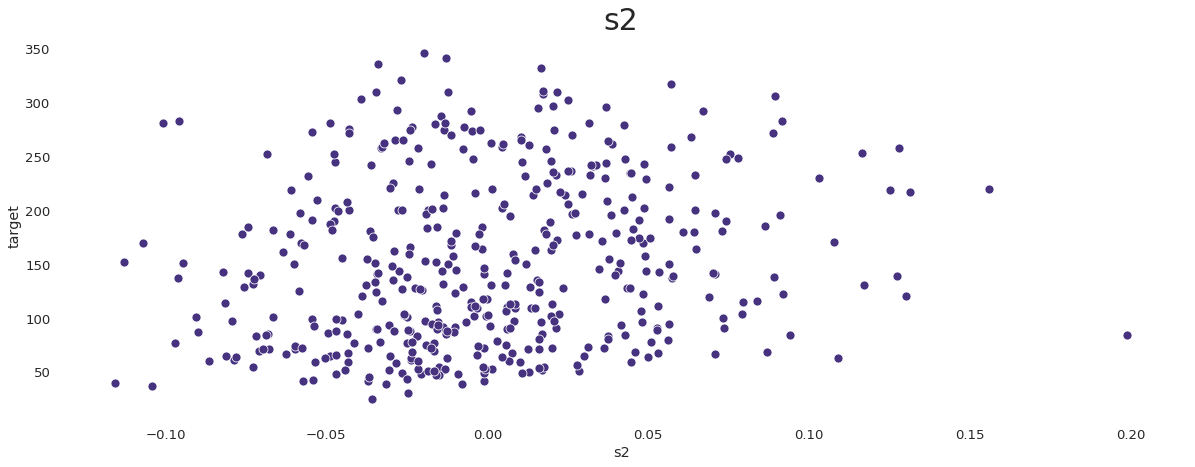

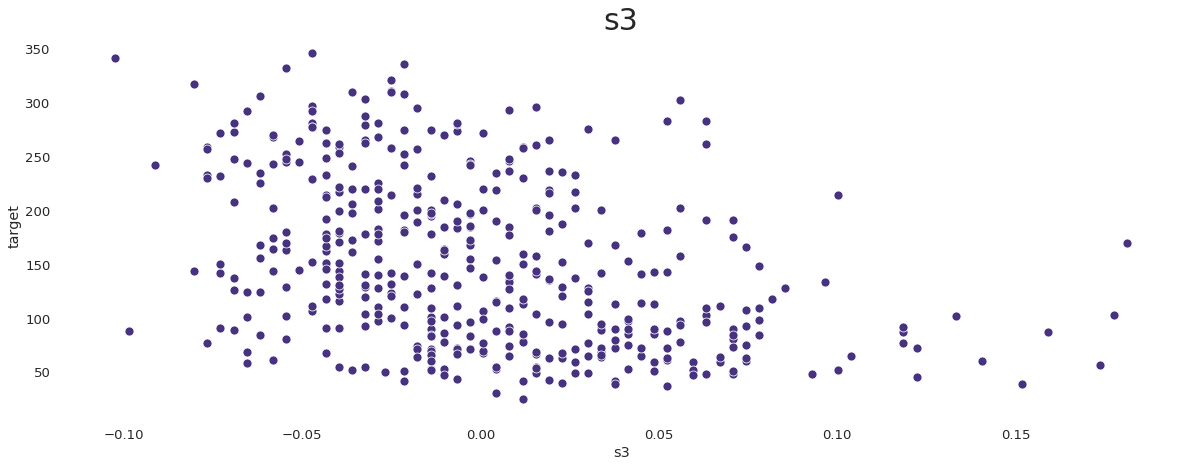

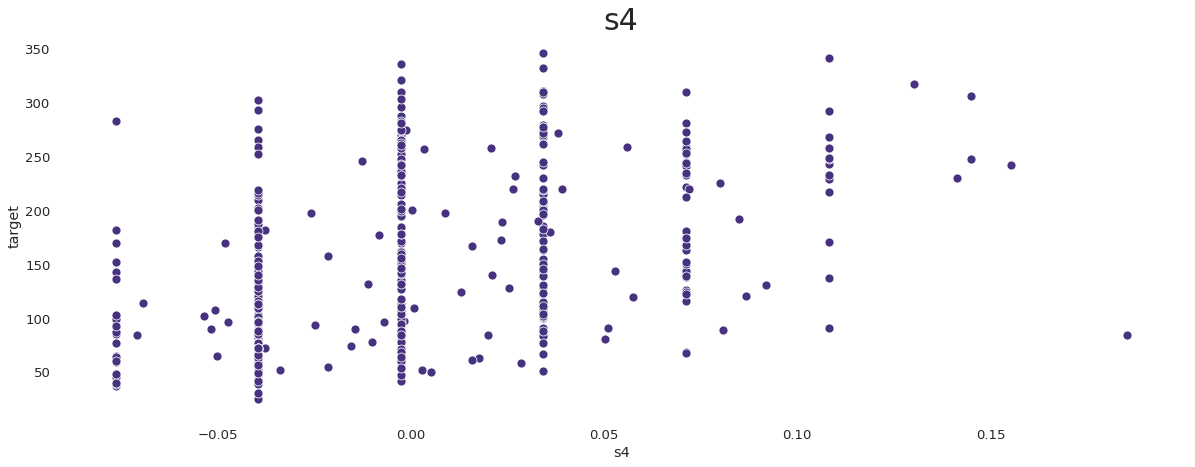

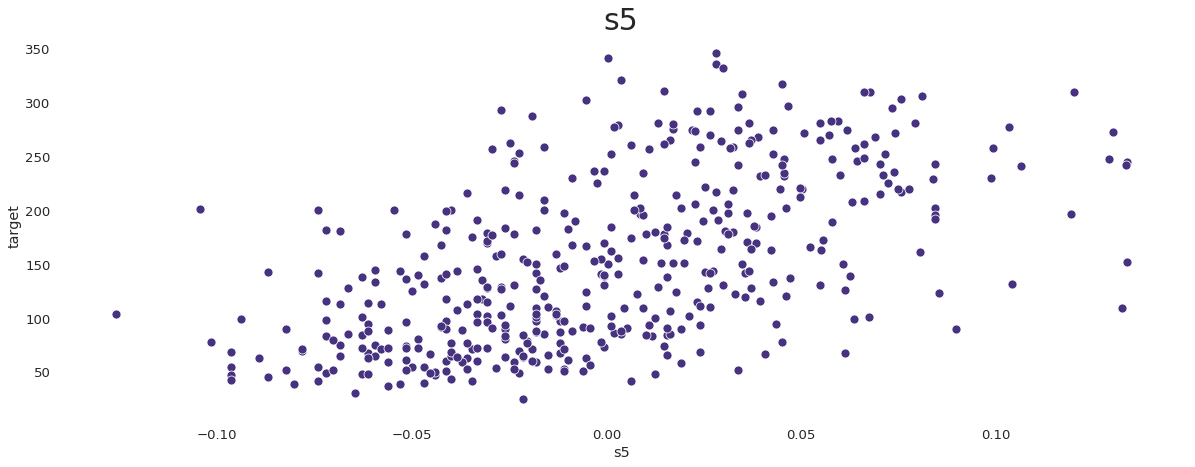

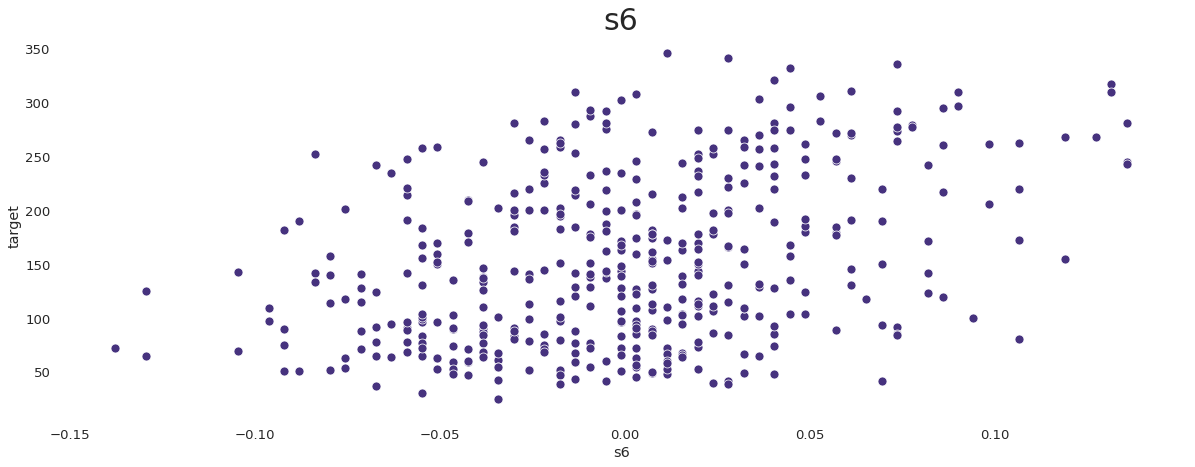

In [70]:
for col in diabetes.columns:
    if col != 'target':
        sns.scatterplot(x=diabetes[col], y=diabetes.target)
        plt.title(col, fontsize=30)
        sns.despine(left=True, bottom=True)
        plt.show()

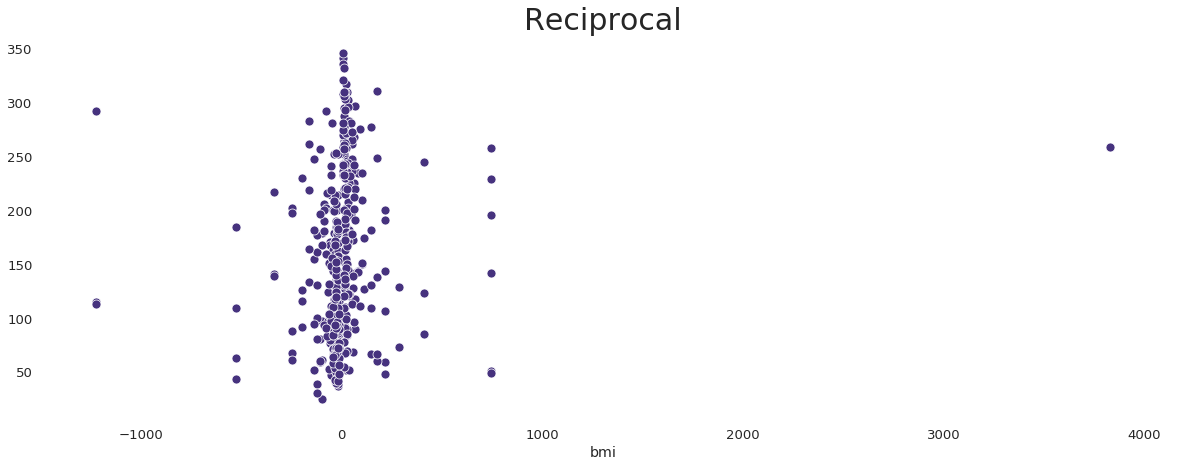

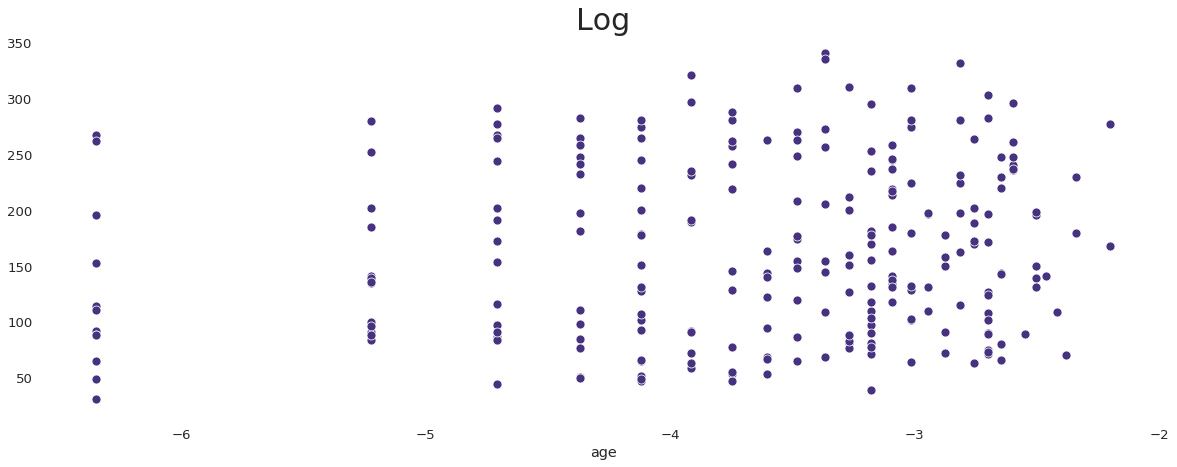

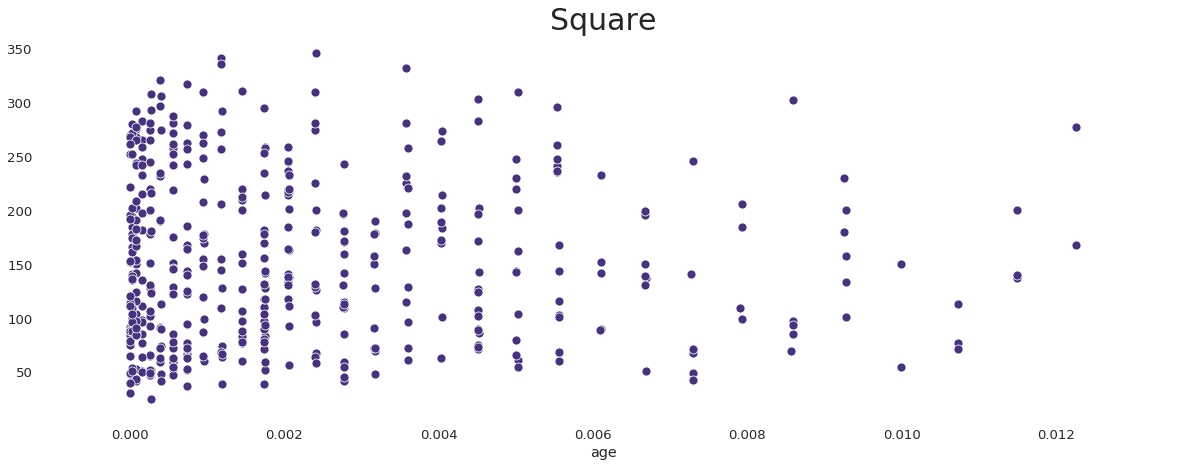

In [93]:
# visualize potential nonlinear transformations for bmi
sns.scatterplot(x=1/(diabetes.bmi), y=target)
plt.title('Reciprocal', fontsize=30)
sns.despine(left=True, bottom=True)
plt.show()

sns.scatterplot(x=np.log(diabetes.age), y=target)
plt.title('Log', fontsize=30)
sns.despine(left=True, bottom=True)
plt.show()

sns.scatterplot(x=(diabetes.age)**2, y=target)
plt.title('Square', fontsize=30)
sns.despine(left=True, bottom=True)
plt.show()


## Assumption: Multivariate Normality

## Assumption: Low Multicollinearity
We can check for collinearity among features with a correlation matrix and heat map.

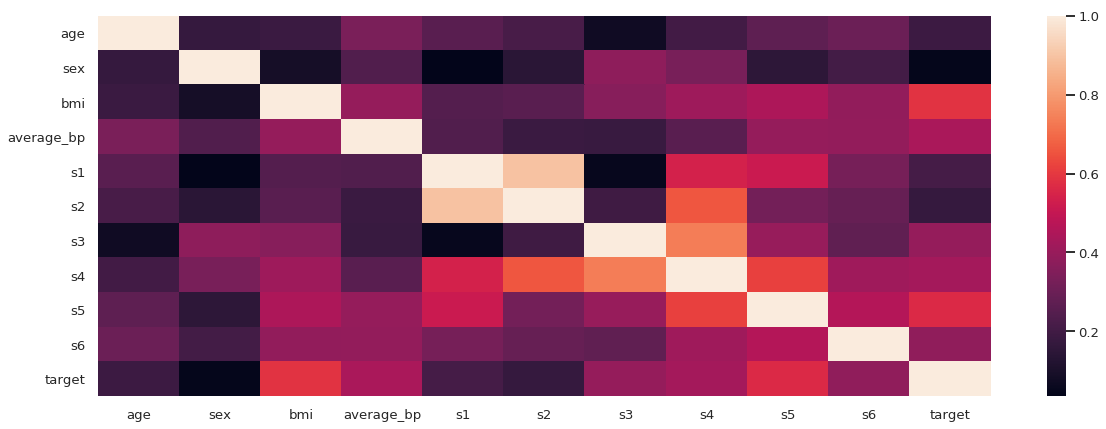

In [57]:
# check for highly correlated features
corr_matrix = diabetes.corr().abs()
sns.heatmap(corr_matrix);

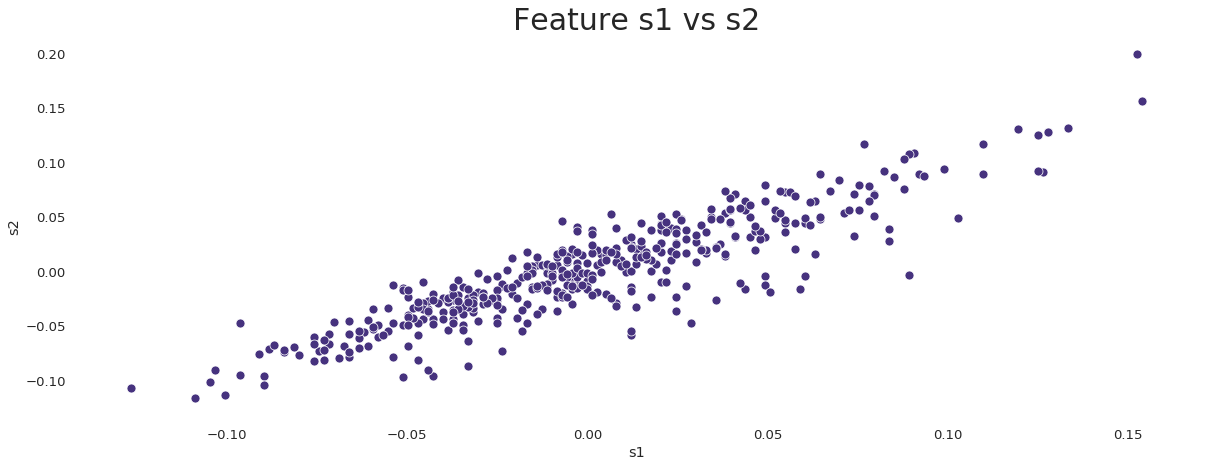

In [64]:
sns.scatterplot(x=diabetes.s1, y=diabetes.s2)
plt.title('Feature s1 vs s2', fontsize=30)
sns.despine(left=True, bottom=True)
plt.show()

In [61]:
# From https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['s2']

In [ ]:
# Drop features 
diabetes = diabetes.drop(diabetes[to_drop], axis=1)